# Regression Scenarios Notebook
This notebook demonstrates step-by-step regression modeling using employee attrition, fraud, and resignation datasets.
We will use Linear Regression and other regression techniques only.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset (Employee Attrition)

In [2]:
df = pd.read_csv('fraud_regression_dataset.csv')
df.head()

,transaction_amount,account_age_days,num_prev_transactions,avg_transaction_amount,location_risk_score,device_risk_score,fraud_risk_score
0,140.780427,2429,142,34.638670,0.891200,0.213142,0.095825
1,903.036429,1031,190,39.737938,0.013634,0.867177,0.358377
2,395.023708,29,532,20.680263,0.322727,0.955843,0.269041
3,273.882766,907,226,325.437001,0.554357,0.236715,0.210230
4,50.887461,2127,312,26.028684,0.148217,0.882615,0.085633


## Step 3: Dataset Info and Preprocessing

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_amount      1200 non-null   float64
 1   account_age_days        1200 non-null   int64  
 2   num_prev_transactions   1200 non-null   int64  
 3   avg_transaction_amount  1200 non-null   float64
 4   location_risk_score     1200 non-null   float64
 5   device_risk_score       1200 non-null   float64
 6   fraud_risk_score        1200 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 65.8 KB
None
       transaction_amount  account_age_days  num_prev_transactions  \
count         1200.000000       1200.000000            1200.000000   
mean           301.814472       1273.463333             410.780833   
std            299.791251        723.221268             228.061643   
min              1.392835          2.000000               0.000000   
25%             81.560

## Step 4: Convert Categorical Columns to Numeric

In [4]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,transaction_amount,account_age_days,num_prev_transactions,avg_transaction_amount,location_risk_score,device_risk_score,fraud_risk_score
0,140.780427,2429,142,34.638670,0.891200,0.213142,0.095825
1,903.036429,1031,190,39.737938,0.013634,0.867177,0.358377
2,395.023708,29,532,20.680263,0.322727,0.955843,0.269041
3,273.882766,907,226,325.437001,0.554357,0.236715,0.210230
4,50.887461,2127,312,26.028684,0.148217,0.882615,0.085633


## Step 5: Define Features and Target

In [5]:
# Change target column if needed
target_column = df.columns[-1]
X = df.drop(target_column, axis=1)
y = df[target_column]
print('Target column:', target_column)

Target column: fraud_risk_score


## Step 6: Split Dataset into Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(960, 6) (240, 6)


## Step 7: Train Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Step 8: Make Predictions

In [8]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[0.20137101 0.20457348 0.23321405 0.09035746 0.0903274  0.22982364
 0.16505222 0.17809601 0.39270591 0.19289409]


## Step 9: Evaluate Model

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 2.7197024387697388e-05
R2 Score: 0.9980668152405665


## Step 10: Plot Results

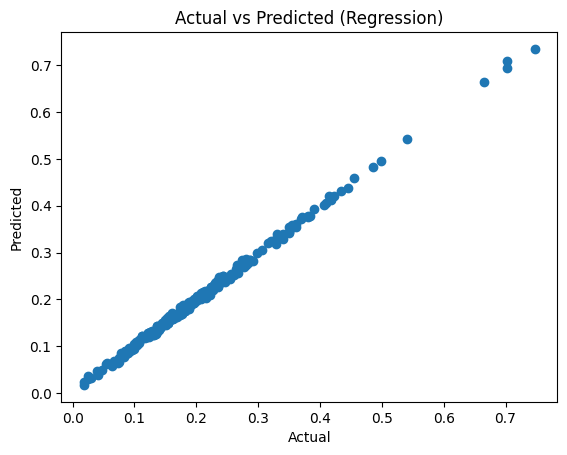

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Regression)')
plt.show()